In [11]:
import numpy as np
import matplotlib.pyplot as plt

znak_wzorcowy_1 = np.array([
[1, 1, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 1, 0, 0, 0]])

znak_wzorcowy_2 = np.array([
[1, 0, 0, 0, 1],
[0, 1, 0, 1, 0],
[0, 0, 1, 0, 0],
[0, 1, 0, 1, 0],
[1, 0, 0, 0, 1]])

znak_wzorcowy_3 = np.array([
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0],
[1, 1, 1, 1, 1],
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0]])


znak_wzorcowy_1 = np.where(znak_wzorcowy_1 == 0 ,-1,znak_wzorcowy_1)
znak_wzorcowy_2 = np.where(znak_wzorcowy_2 == 0 ,-1,znak_wzorcowy_2)
znak_wzorcowy_3 = np.where(znak_wzorcowy_3 == 0 ,-1,znak_wzorcowy_3)
wzorce = [znak_wzorcowy_1,znak_wzorcowy_2,znak_wzorcowy_3]

znak_testowy_1 = np.array([
[0, 1, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 1, 0, 0, 0]])

znak_testowy_2 = np.array([
[1, 1, 0, 0, 1],
[0, 1, 0, 1, 0],
[0, 1, 1, 1, 0],
[0, 1, 0, 1, 0],
[1, 1, 0, 0, 1]])

znak_testowy_3 = np.array([
[0, 0, 0, 0, 0],
[0, 0, 1, 0, 0],
[1, 1, 1, 1, 1],
[0, 0, 0, 0, 0],
[0, 0, 1, 0, 0]])

znak_testowy_4 = np.array([
[0, 1, 1, 1, 1],
[1, 0, 1, 1, 1],
[1, 0, 1, 1, 1],
[1, 0, 1, 1, 1],
[1, 0, 1, 1, 1]])

znak_testowy_1 = np.where(znak_testowy_1 == 0 ,-1,znak_testowy_1)
znak_testowy_2 = np.where(znak_testowy_2 == 0 ,-1,znak_testowy_2)
znak_testowy_3 = np.where(znak_testowy_3 == 0 ,-1,znak_testowy_3)
znak_testowy_4 = np.where(znak_testowy_4 == 0 ,-1,znak_testowy_4)
testy = [znak_testowy_1,znak_testowy_2,znak_testowy_3,znak_testowy_4]

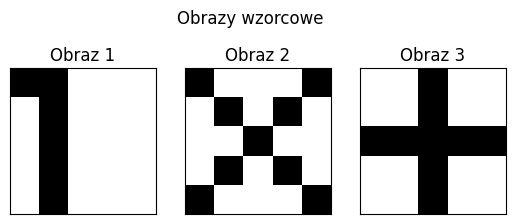

In [12]:
for i, wzorzec in enumerate(wzorce):
    wzorce2 = wzorzec
    plt.subplot(2, 3, i + 1)
    plt.imshow(wzorce2, cmap='binary')
    plt.title(f"Obraz {i + 1}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Obrazy wzorcowe")
plt.show()

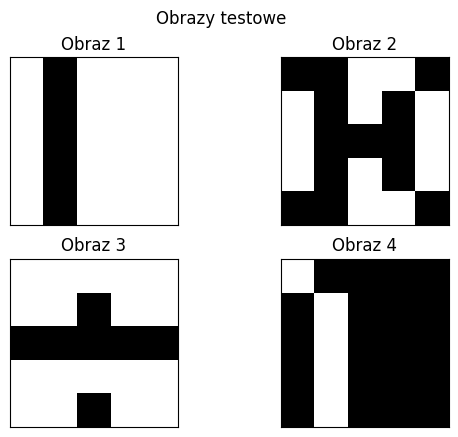

In [13]:
for i, test in enumerate(testy):
    testy2 = test
    plt.subplot(2, 2,i+1)
    plt.imshow(testy2, cmap='binary')
    plt.title(f"Obraz {i+1}")
    plt.xticks([])
    plt.yticks([])
    
plt.suptitle("Obrazy testowe")
plt.show()

In [14]:
class Hopfield:
    def __init__(self, size=25):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        n = self.size
        for pattern in patterns:
            pattern = np.array(pattern).reshape(-1, 1)
            for i in range(n):
                for j in range(n):
                    if i != j:
                        self.weights[i, j] += (1 / n) * pattern[i] * pattern[j]
        np.fill_diagonal(self.weights, 0)

    def recognize(self, pattern):
        binary_pattern = pattern.flatten()
        for i in range(self.size):
            activation = np.sum(self.weights[i, :] * binary_pattern)
            if activation >= 0:
                binary_pattern[i] = 1
            else:
                binary_pattern[i] = -1
        return binary_pattern.reshape(5,5)

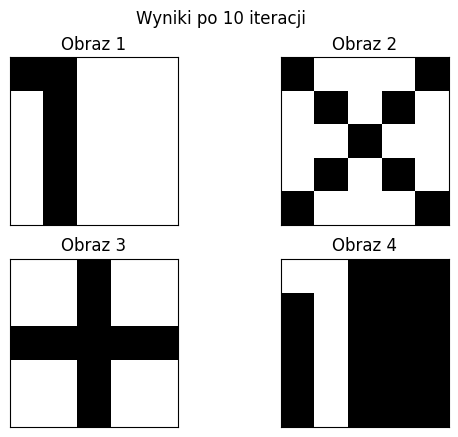

In [15]:
network = Hopfield(25)
iter = 10 

for iteracja in range(iter):
    network.train(wzorce)

for i, test_pattern in enumerate(testy):
    recalled_pattern = network.recognize(test_pattern)
    recalled_pattern2 = network.recognize(recalled_pattern)
    plt.subplot(2, 2, i + 1)
    plt.imshow(recalled_pattern2, cmap='binary')
    plt.title(f"Obraz {i + 1}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle(f"Wyniki po {iteracja + 1} iteracji")
plt.show()